In [27]:
import pandas as pd # pandas library for data manipulation and analysis
import numpy as np  #numpy library for numerical operations and array handling
import re #regular expressions library for string searching and manipulation
import matplotlib.pyplot as plt  #pyplot module from matplotlib for creating static visualizations
import seaborn as sns # seaborn library for statistical data visualization
import missingno as msno #issingno library for visualizing missing data in datasets
from scipy import stats #tats module from the scipy library for statistical functions and tests

In [28]:
df = pd.read_excel('Open_DATA_Import Janar-Dhjetor-2024.xlsx', sheet_name='IMPORT_1')


In [29]:
print(df)  

        VITI  MUAJI Regjimi        Origjina  \
0       2024      1     IM4       CN - KINA   
1       2024      1     IM4    PL - POLONIA   
2       2024      1     IM4       CN - KINA   
3       2024      1     IM4  BG - BULLGARIA   
4       2024      1     IM4  DE - GJERMANIA   
...      ...    ...     ...             ...   
233633  2024     12     IM4  DE - GJERMANIA   
233634  2024     12     IM4      IN - INDIA   
233635  2024     12     IM4     IT - ITALIA   
233636  2024     12     IM4       CN - KINA   
233637  2024     12     IM4    PL - POLONIA   

                                             Kodi Tarifor  Sasia  \
0       8807100090 - Helikat dhe rotorët dhe pjesët e ...    NaN   
1       8529101190 - Antenat teleskopike dhe të tipit ...    NaN   
2       8806229090 - Me peshën maksimale të ngritjes m...    NaN   
3       8413703090 - Pompat forcuese glandless për sis...   20.0   
4       9405618090 - Shenjat e ndriçimit, tabelat e nd...    NaN   
...                        

In [30]:
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

+---+------+-------+---------+----------------+--------------------------------------------------------------------------------------------------------------------------------+-------+----------------+-----------+---------------+---------------+---------------+
|   | VITI | MUAJI | Regjimi |    Origjina    |                                                          Kodi Tarifor                                                          | Sasia | Vlera Mallrave | Netweight | Taksa Doganës | Taksa Akcizës | Taksa TVSH-së |
+---+------+-------+---------+----------------+--------------------------------------------------------------------------------------------------------------------------------+-------+----------------+-----------+---------------+---------------+---------------+
| 0 | 2024 |   1   |   IM4   |   CN - KINA    |                                       8807100090 - Helikat dhe rotorët dhe pjesët e tyre                                       |  nan  |     786.21     |    1.0    | 

In [31]:
df.describe()

,VITI,MUAJI,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
count,233638.0,233638.000000,7.294300e+04,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05,2.336380e+05
mean,2024.0,6.634961,2.797952e+04,2.708681e+04,2.332468e+04,7.196629e+02,2.621695e+03,4.395679e+03
std,0.0,3.438751,6.357634e+05,2.529220e+05,4.405324e+05,9.445219e+03,1.291118e+05,6.060343e+04
min,2024.0,1.000000,1.000000e-02,0.000000e+00,5.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024.0,4.000000,4.065000e+00,2.425000e+02,1.000000e+01,0.000000e+00,0.000000e+00,2.798000e+01
50%,2024.0,7.000000,4.100000e+01,1.564370e+03,1.320000e+02,5.890000e+00,0.000000e+00,2.019600e+02
75%,2024.0,10.000000,5.939200e+02,9.675280e+03,1.782898e+03,9.960750e+01,0.000000e+00,1.306477e+03
max,2024.0,12.000000,6.315474e+07,3.772116e+07,5.145773e+07,1.015553e+06,2.256510e+07,1.084940e+07


In [32]:
df.tail()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
233633,2024,12,IM4,DE - GJERMANIA,9002900090 - Të tjera,NaN,20.00,1.000,2.00,0.0,3.96
233634,2024,12,IM4,IN - INDIA,9004109100 - Syze dielli me lente plastike,1.0,67.00,0.300,6.70,0.0,13.27
233635,2024,12,IM4,IT - ITALIA,"9004109900 - Syze dielli me lente jo plastike,...",290.0,16829.22,51.720,182.37,0.0,3062.09
233636,2024,12,IM4,CN - KINA,8529909100 - Dritat emituese me Dioda (LED) mo...,NaN,655.55,8.395,65.56,0.0,129.80
233637,2024,12,IM4,PL - POLONIA,8529909290 - Të tjera,NaN,577.26,12.000,57.73,0.0,114.30


In [33]:
# print a summary of the DataFrame's structure
data_info = df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233638 entries, 0 to 233637
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   VITI            233638 non-null  int64  
 1   MUAJI           233638 non-null  int64  
 2   Regjimi         233638 non-null  object 
 3   Origjina        233638 non-null  object 
 4   Kodi Tarifor    233638 non-null  object 
 5   Sasia           72943 non-null   float64
 6   Vlera Mallrave  233638 non-null  float64
 7   Netweight       233638 non-null  float64
 8   Taksa Doganës   233638 non-null  float64
 9   Taksa Akcizës   233638 non-null  float64
 10  Taksa TVSH-së   233638 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 19.6+ MB
None


In [34]:
# print the shape of dataset
df.shape

(233638, 11)

In [35]:
print(df.describe().T)

                   count          mean            std       min       25%  \
VITI            233638.0   2024.000000       0.000000  2024.000  2024.000   
MUAJI           233638.0      6.634961       3.438751     1.000     4.000   
Sasia            72943.0  27979.524529  635763.398873     0.010     4.065   
Vlera Mallrave  233638.0  27086.812414  252921.972771     0.000   242.500   
Netweight       233638.0  23324.680984  440532.397847     0.005    10.000   
Taksa Doganës   233638.0    719.662944    9445.218869     0.000     0.000   
Taksa Akcizës   233638.0   2621.695037  129111.766048     0.000     0.000   
Taksa TVSH-së   233638.0   4395.678829   60603.433861     0.000    27.980   

                    50%         75%          max  
VITI            2024.00  2024.00000      2024.00  
MUAJI              7.00    10.00000        12.00  
Sasia             41.00   593.92000  63154738.50  
Vlera Mallrave  1564.37  9675.28029  37721159.11  
Netweight        132.00  1782.89750  51457733.00  


In [36]:
df.describe(include=['O'])


,Regjimi,Origjina,Kodi Tarifor
count,233638,233638,233638
unique,1,194,6699
top,IM4,CN - KINA,3926909790 - Artikuj te tjere prej plastike
freq,233638,27784,595


In [37]:
duplicated=df.duplicated().sum()
print((duplicated/len(df))*100 , '%')

0.0 %


<Axes: >

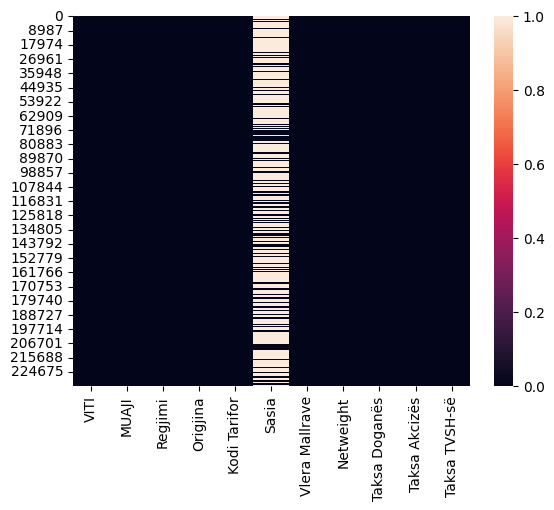

In [38]:
sns.heatmap(df.isnull())
